## California Housing Price Prediction

construct machine learning models to predict the price of houses in California   

<br>

- longitude: A measure of how har west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farter north
- housing_median_age: Median age of a house within a block; a lower number is a newer building
- total_rooms: Total number of rooms within a block
- total_bedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- ocean_proximity: Location of the house w.r.t ocean/sea
- meadian_house_value: Median house value for households within a block($)


In [1]:
import pandas as pd

In [47]:
주택 = pd.read_csv('housing.csv')

In [48]:
주택.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
주택.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


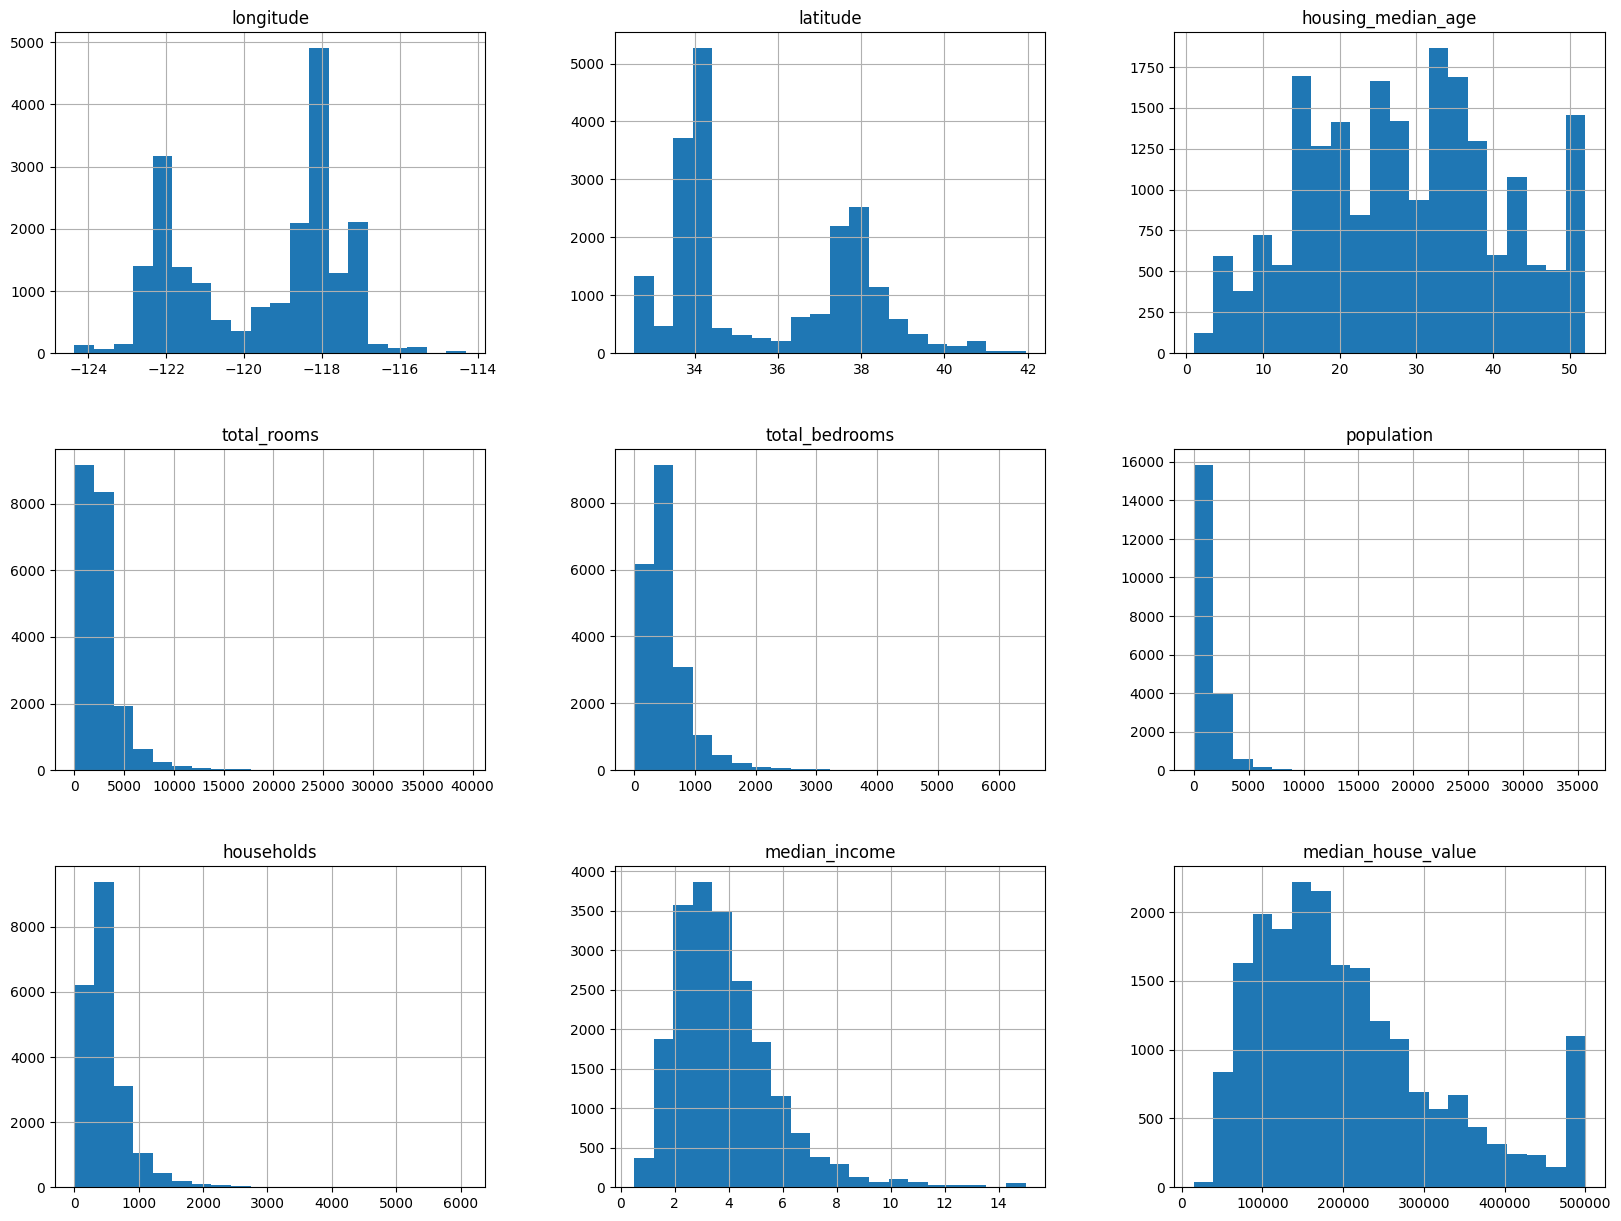

In [50]:
import matplotlib.pyplot as plt

주택.hist(bins=20, figsize=(20, 15))
plt.show()

## Data Science Analysis Tools

!pip install scikit-learn statmodels


- sklearn vs statmodels
    - sklearn: machine learning에 특화 (베타 추정x, weight들 알 수 없음 -> 설명할 수 없음)
    - statmodels: statistical learning에 특화
    

In [51]:
!pip install scikit-learn

In [52]:
!pip install statsmodels

### 학습자료와 검증자료 분리

In [53]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(주택, test_size = 0.25, random_state = 316)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 12704 to 17213
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15318 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   median_house_value  15480 non-null  float64
 9   ocean_proximity     15480 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


### 순서자료(ordinal data)로 변환

- 중위소득
    - [0,2),[2,4),[4,6),[6,10),[10,infinity)

In [55]:
import numpy as np

In [56]:
주택['중위소득범주'] = pd.cut(주택['median_income'], bins = [0.0, 2, 4, 6, 10, np.inf], labels=[1,2,3,4,5])
주택.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  중위소득범주              20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
주택.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,중위소득범주
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2


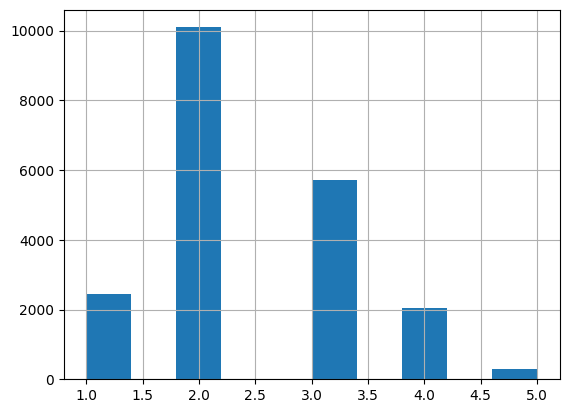

In [58]:
주택['중위소득범주'].hist()
plt.show()

In [59]:
주택['중위소득범주'].value_counts()

2    10096
3     5725
1     2457
4     2054
5      308
Name: 중위소득범주, dtype: int64

In [60]:
주택['중위소득범주'].value_counts()/len(주택)

2    0.489147
3    0.277374
1    0.119041
4    0.099516
5    0.014922
Name: 중위소득범주, dtype: float64

### 범주형 자료를 숫자로 표시
- 범주형 = 명목자료(nominal data) + 순서자료(ordinal data)
- 범주의 수가 2개이면 어떤 자료인지 관계 없음
- 순서자료: 숫자 순으로 순서 표시
- 명목자료: 가변수 사용 => one hot

In [61]:
해변근접성 = 주택[['ocean_proximity']]
해변근접성.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [62]:
from sklearn.preprocessing import OneHotEncoder

가변수처리 = OneHotEncoder()
해변가변수 = 가변수처리.fit_transform(해변근접성)
해변가변수.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [63]:
가변수처리.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [64]:
# 만약 순서자료라면
from sklearn.preprocessing import OrdinalEncoder

순서변환 = OrdinalEncoder()
해변순서 = 순서변환.fit_transform(해변근접성)
해변순서[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

### 중위소득범주 비율에 맞게 학습-검증 자료 분리

In [65]:
train_범주, test_범주 = train_test_split(주택, test_size = 0.25, random_state = 316, stratify=주택['중위소득범주'])

### 변수(Column) 삭제

In [66]:
주택.drop('중위소득범주', axis = 1, inplace = True)
주택.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 결측값 대체
- DF 전체에 적용할 것인지, 특정 변수에만 적용할 것인지

#### 특정 변수에만 적용하는 경우: 중앙값 대체

In [67]:
대체주택 = 주택.copy()
결측개수 = 대체주택['total_bedrooms'].isna().sum()
print(결측개수)

207


In [69]:
대체주택['total_bedrooms'].fillna(대체주택['total_bedrooms'].median, inplace = True)
결측개수 = 대체주택['total_bedrooms'].isna().sum()
print(결측개수)

0


#### 전체에 적용하는 경우

In [70]:
from sklearn.impute import SimpleImputer
대체방법 = SimpleImputer(strategy = 'median')

In [71]:
# 수치 변수에 대해서만 적용
주택수치 = 주택.drop('ocean_proximity', axis = 1)
대체방법.fit(주택수치)
대체방법.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [72]:
주택수치.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [73]:
# 대체자료는 numpy.ndarray
대체자료 = 대체방법.transform(주택수치)

In [74]:
대체df = pd.DataFrame(대체자료, columns = 주택수치.columns, index = 주택수치.index)
대체df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### 결측값 제거

#### 결측값이 들어있는 행 전체 삭제하기 (delete row with NaN) : df.dropna(axis = 0)

#### 결측값이 들어있는 열 전체 삭제하기 (delete column with NaN) : df.dropna(axis = 1)

#### 특정 행 또는 열을 대상으로 결측값이 들어있으면 제거 (delete specific row or column with missing values) :

- df['C1'].dropna()
- df[['C1', 'C2', 'C3']].dropna() # same with dropna(axis = 0)
- df[['C1', 'C2', 'C3']].dropna(axis = 0) # by default, the same with dropna()
- df[['C1', 'C2', 'C3']].dropna(axis = 1)
- df.ix[[2,4],['C1', 'C2', 'C3']].dropna(axis = 0)

## 데이터 시각화

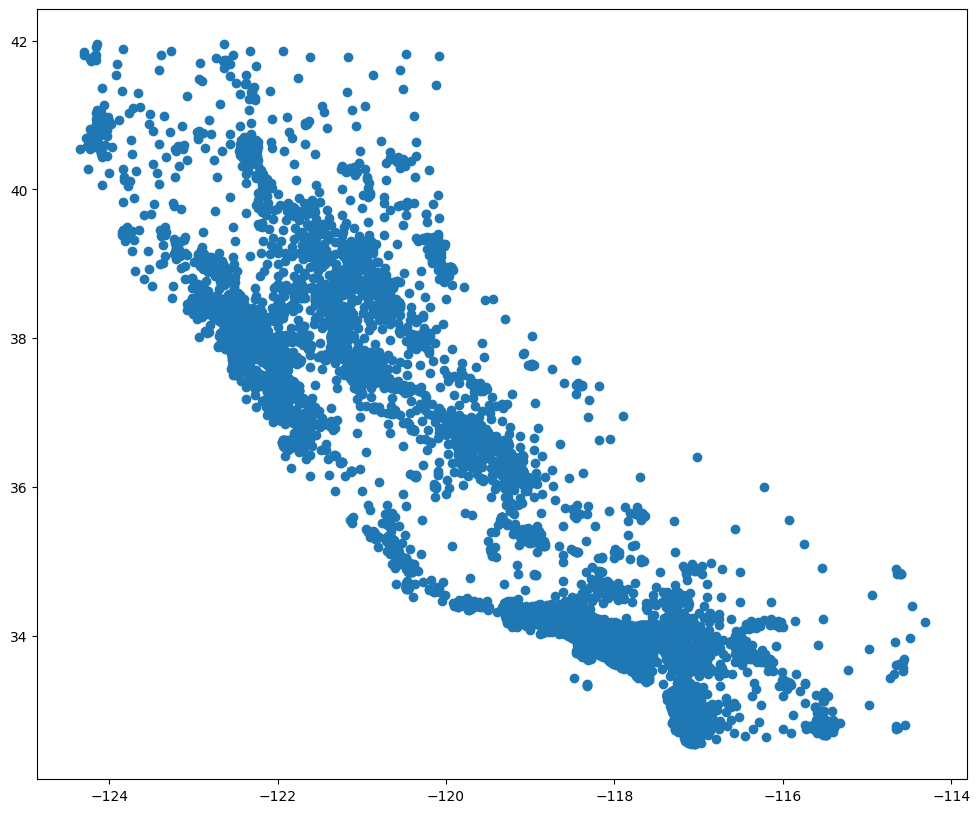

In [75]:
plt.figure(figsize=(12, 10))
plt.scatter(주택['longitude'], 주택['latitude'])
plt.show()

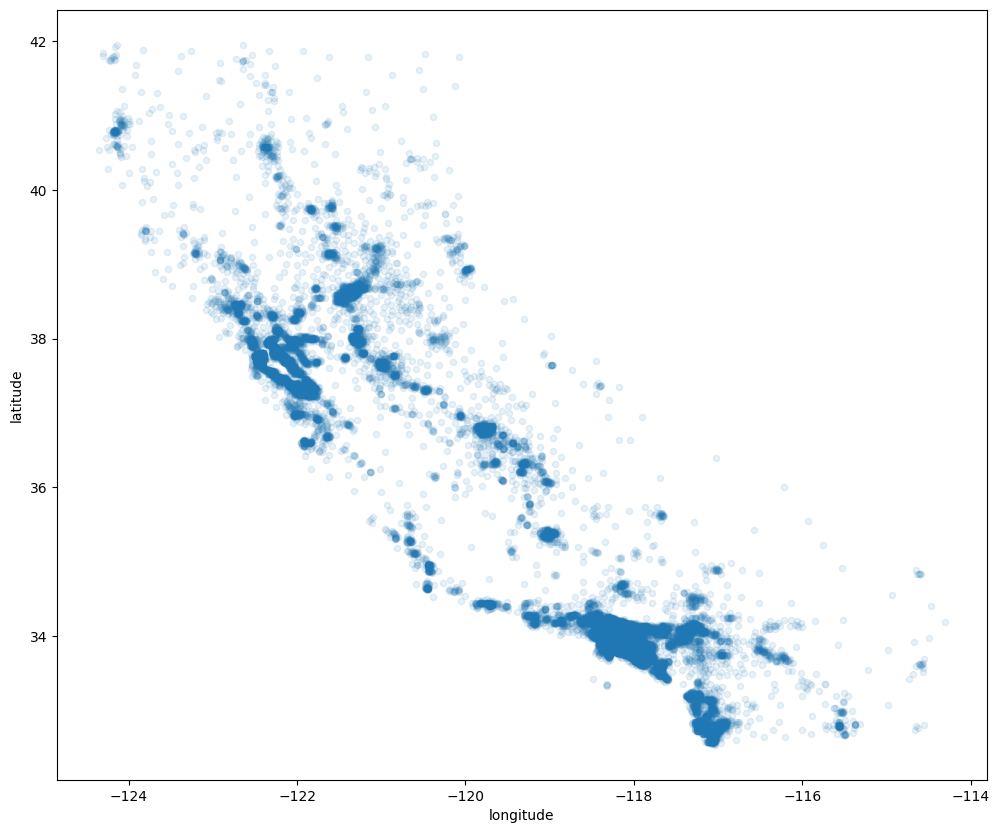

In [76]:
주택.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1, figsize = (12, 10))   # alpha: 색 투명도 (1 -> 위의 그림같이 진하게)
plt.show()

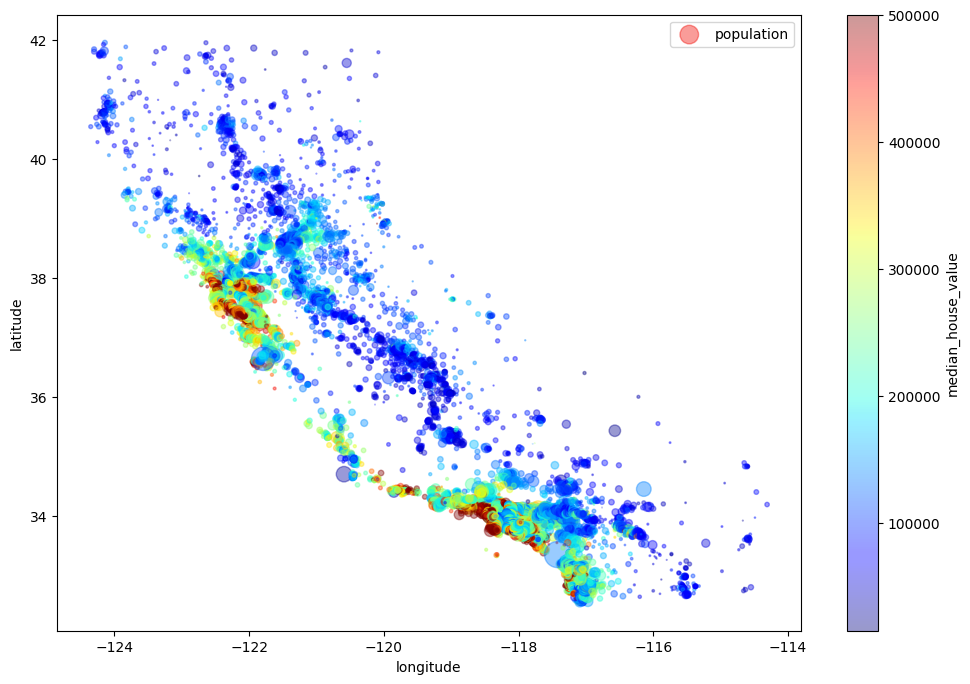

In [78]:
주택.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = 주택['population']/100, label = 'population',
       figsize = (12, 8), c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True, sharex = False)
plt.legend()
plt.show()

## 회귀분석

In [79]:
y = 주택['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [86]:
주택.dropna(axis = 1, inplace=True)

In [87]:
X일부 = 주택.drop(['median_house_value', 'ocean_proximity'], axis=1)
X일부
# 수치데이터만

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672


In [88]:
X가변수 = pd.DataFrame(해변가변수.toarray(), columns=['l1', 'l2', 'l3', 'l4', 'l5'], index = 주택수치.index)
X가변수.drop('l1', axis=1, inplace=True)   # 5개의 합이 1이 됨 -> 종속성 발생, l1: 절편. (intercept) -> 가변수 하나를 빼야 함
X가변수

,l2,l3,l4,l5
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
20635,1.0,0.0,0.0,0.0
20636,1.0,0.0,0.0,0.0
20637,1.0,0.0,0.0,0.0
20638,1.0,0.0,0.0,0.0


In [89]:
#X = pd.concat([X일부, X가변수], axis = 1)
X = pd.merge(X일부, X가변수, left_index=True, right_index=True)
X

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,l2,l3,l4,l5
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,1.0,0.0,0.0,0.0


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
선형회귀 = LinearRegression()
선형회귀.fit(X, y)   # X: 설명변수, y: 반응변수

print('절편(bias): ', 선형회귀.intercept_)
print('회귀계수(weights): ', 선형회귀.coef_)

절편(bias):  -2121863.652102104
회귀계수(weights):  [-2.53164666e+04 -2.43794453e+04  1.03486613e+03 -4.36039354e-01
 -4.21435304e+01  1.39016249e+02  3.75002334e+04 -4.10661733e+04
  1.62839956e+05 -3.08217410e+03  5.04268168e+03]


In [93]:
선형회귀.predict(X)   # y hat 계산해줌

array([404181.07027176, 433181.98193316, 376007.29587218, ...,
        42766.51834308,  52307.68382487,  66761.90666809])

In [94]:
import statsmodels.api as sm

X = sm.add_constant(X)     # 베타0 햇 값을 추정하기 위한 1을 넣음

model = sm.OLS(y, X).fit()     # Ordinal Least Square 최소제곱법 - y가 먼저 들어감! 
predictions = model.predict(X)   # y hat 값 추정이 목적

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     3377.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:33:28   Log-Likelihood:            -2.5924e+05
No. Observations:               20640   AIC:                         5.185e+05
Df Residuals:                   20628   BIC:                         5.186e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.122e+06   8.73

In [95]:
print(predictions)

0        404181.070272
1        433181.981933
2        376007.295872
3        319033.772991
4        256761.327018
             ...      
20635     34061.957320
20636     57983.821149
20637     42766.518343
20638     52307.683825
20639     66761.906668
Length: 20640, dtype: float64
